## Notes:
- The data here comes from candy bar sales only from a shop
- The data comes with the assumption that 1 transaction has no more than 1 chocolate bar brand
- Brand 1 is the cheapest and Brand 5 is the most expensive

# Exploratory Analysis

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load and explore the data

In [2]:
raw_df = pd.read_csv('dataset/purchase data.csv')

In [3]:
df_purchase = raw_df.copy()

In [4]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [5]:
df_purchase.describe()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,5.869300e+04,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,...,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,2.000003e+08,349.431074,0.249399,0.844309,0.691973,0.840799,0.248070,1.392074,1.780999,2.006789,...,0.042799,0.117851,0.035865,0.385889,0.393113,38.793962,1.101579,121841.644319,0.774198,0.655904
std,1.443167e+02,212.045058,0.432669,1.633083,1.498734,1.631628,0.431897,0.091139,0.170868,0.046867,...,0.202405,0.322434,0.185954,0.486809,0.488446,12.052447,0.652499,40643.740678,0.663247,0.794162
min,2.000000e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,1.260000,1.870000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,38247.000000,0.000000,0.000000
25%,2.000001e+08,161.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.340000,1.580000,1.970000,...,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,95541.000000,0.000000,0.000000
50%,2.000003e+08,343.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.390000,1.880000,2.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,1.000000,117971.000000,1.000000,0.000000
75%,2.000004e+08,530.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.470000,1.890000,2.060000,...,0.000000,0.000000,0.000000,1.000000,1.000000,46.000000,1.000000,138525.000000,1.000000,1.000000
max,2.000005e+08,730.000000,1.000000,5.000000,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,...,1.000000,1.000000,1.000000,1.000000,1.000000,75.000000,3.000000,309364.000000,2.000000,2.000000


### In this case, describe cannot tell much because our data record the transactions of each customer, so each customer can appear many time in our data. So, it can't tell anything.

In [6]:
df_purchase.isna().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

## Cluster/Segment the customer with our model

In [7]:
scaler = pickle.load(open('pickle/scaler.pickle','rb'))

In [8]:
pca = pickle.load(open('pickle/pca.pickle','rb'))

In [9]:
kmeans_pca = pickle.load(open('pickle/kmeans_pca.pickle','rb'))

In [10]:
# choose only relevant features
features = df_purchase.loc[:,'Sex':'Settlement size']

In [11]:
features

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,47,1,110866,1,0
1,0,0,47,1,110866,1,0
2,0,0,47,1,110866,1,0
3,0,0,47,1,110866,1,0
4,0,0,47,1,110866,1,0
...,...,...,...,...,...,...,...
58688,0,0,42,1,120946,1,0
58689,0,0,42,1,120946,1,0
58690,0,0,42,1,120946,1,0
58691,0,0,42,1,120946,1,0


In [12]:
# Standardize
scaled_features = scaler.transform(features)

In [13]:
# PCA
pca_features = pca.transform(scaled_features)

In [14]:
# kmeans clustering
clustered_purchase_segment = kmeans_pca.predict(pca_features)

In [15]:
df_purchase_cluster = df_purchase.copy()

In [16]:
df_purchase_cluster['Cluster'] = clustered_purchase_segment

In [17]:
df_purchase_cluster

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58688,200000500,703,0,0,0,2,1,1.41,1.85,2.01,...,0,0,0,0,42,1,120946,1,0,0
58689,200000500,710,0,0,0,0,0,1.36,1.84,2.09,...,0,0,0,0,42,1,120946,1,0,0
58690,200000500,717,0,0,0,0,0,1.50,1.80,2.14,...,0,0,0,0,42,1,120946,1,0,0
58691,200000500,722,1,2,3,0,0,1.51,1.82,2.09,...,0,0,0,0,42,1,120946,1,0,0


## Let's analyze this!

### Each customer behavior

In [18]:
temp1 = df_purchase_cluster[['ID','Incidence']].groupby('ID', as_index = True).count()
temp1 = temp1.rename(columns = {'Incidence':'No_of_visits'})
temp1

,No_of_visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111
...,...
200000496,120
200000497,120
200000498,131


In [19]:
temp2 = df_purchase_cluster[['ID','Incidence']].groupby('ID', as_index = True).sum()
temp2 = temp2.rename(columns = {'Incidence':'No_of_purchases'})
temp2

,No_of_purchases
ID,
200000001,9
200000002,11
200000003,10
200000004,11
200000005,13
...,...
200000496,20
200000497,43
200000498,39


In [20]:
temp3 = temp1.join(temp2)
temp3

,No_of_visits,No_of_purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13
...,...,...
200000496,120,20
200000497,120,43
200000498,131,39


In [21]:
temp3['Purchases_ratio'] = temp3['No_of_purchases'] / temp3['No_of_visits']
temp3

,No_of_visits,No_of_purchases,Purchases_ratio
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117
...,...,...,...
200000496,120,20,0.166667
200000497,120,43,0.358333
200000498,131,39,0.297710


In [22]:
# 1 customer in 1 cluster, so if we find mean we will find that cluster number
temp4 = df_purchase_cluster[['ID','Cluster']].groupby('ID', as_index = True).mean()
temp4

,Cluster
ID,
200000001,0
200000002,1
200000003,0
200000004,0
200000005,3
...,...
200000496,2
200000497,0
200000498,2


In [23]:
df_purchase_desc = temp3.join(temp4)
df_purchase_desc

,No_of_visits,No_of_purchases,Purchases_ratio,Cluster
ID,,,,
200000001,101,9,0.089109,0
200000002,87,11,0.126437,1
200000003,97,10,0.103093,0
200000004,85,11,0.129412,0
200000005,111,13,0.117117,3
...,...,...,...,...
200000496,120,20,0.166667,2
200000497,120,43,0.358333,0
200000498,131,39,0.297710,2


### Cluster proportion

In [24]:
cluster_prop = df_purchase_desc[['Cluster','No_of_purchases']].groupby('Cluster', as_index = True).count() / df_purchase_desc.shape[0]
cluster_prop

,No_of_purchases
Cluster,
0,0.378
1,0.196
2,0.206
3,0.220


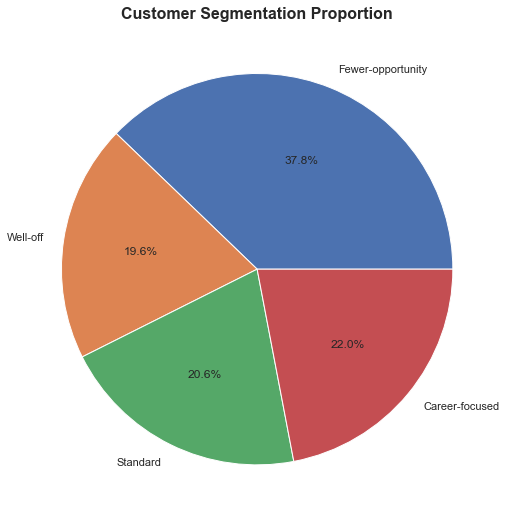

In [25]:
plt.figure(figsize = (10,9))
plt.pie(cluster_prop['No_of_purchases'], 
        labels = ['Fewer-opportunity','Well-off','Standard','Career-focused'],
        autopct = '%1.1f%%')
plt.title('Customer Segmentation Proportion', weight = 'bold', fontsize = 16)
plt.show()

## Look at mean and std of Cluster

In [26]:
cluster_mean = df_purchase_desc.groupby('Cluster').mean()
cluster_mean

,No_of_visits,No_of_purchases,Purchases_ratio
Cluster,,,
0,113.730159,22.756614,0.201588
1,117.295918,34.602041,0.284478
2,117.699029,24.902913,0.212773
3,123.454545,39.827273,0.283102


In [27]:
cluster_std = df_purchase_desc.groupby('Cluster').std()
cluster_std

,No_of_visits,No_of_purchases,Purchases_ratio
Cluster,,,
0,16.410498,13.815040,0.120335
1,20.716152,25.900579,0.171787
2,19.039605,16.774464,0.126603
3,44.864656,53.744530,0.200056


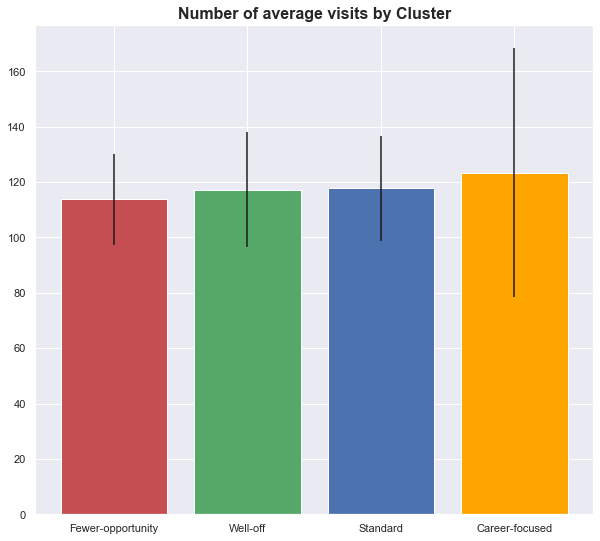

In [28]:
plt.figure(figsize = (10,9))
plt.bar(x = (0,1,2,3), 
        height = cluster_mean['No_of_visits'],
        yerr = cluster_std['No_of_visits'],
        tick_label = ['Fewer-opportunity','Well-off','Standard','Career-focused'],
        color = ['r','g','b','orange'])
plt.title('Number of average visits by Cluster', weight = 'bold', fontsize = 16)
plt.show()

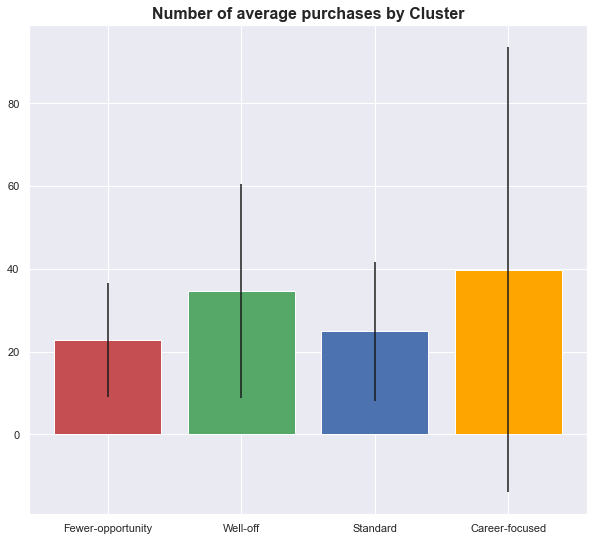

In [29]:
plt.figure(figsize = (10,9))
plt.bar(x = (0,1,2,3), 
        height = cluster_mean['No_of_purchases'],
        yerr = cluster_std['No_of_purchases'],
        tick_label = ['Fewer-opportunity','Well-off','Standard','Career-focused'],
        color = ['r','g','b','orange'])
plt.title('Number of average purchases by Cluster', weight = 'bold', fontsize = 16)
plt.show()

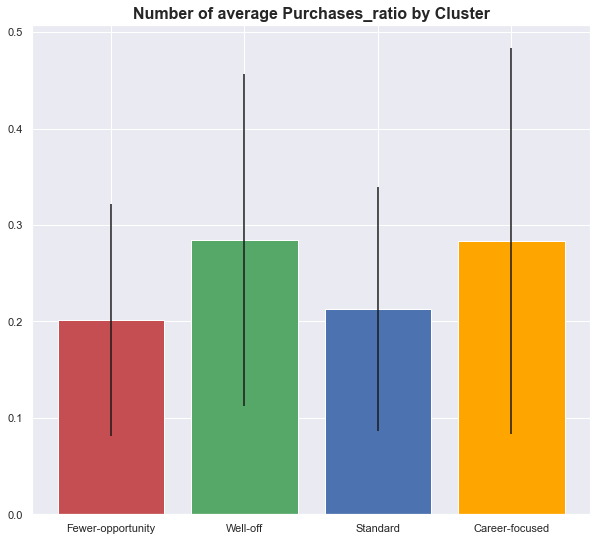

In [30]:
plt.figure(figsize = (10,9))
plt.bar(x = (0,1,2,3), 
        height = cluster_mean['Purchases_ratio'],
        yerr = cluster_std['Purchases_ratio'],
        tick_label = ['Fewer-opportunity','Well-off','Standard','Career-focused'],
        color = ['r','g','b','orange'])
plt.title('Number of average Purchases_ratio by Cluster', weight = 'bold', fontsize = 16)
plt.show()

## Brand choices

In [31]:
df_purchase_incidence = df_purchase_cluster[df_purchase_cluster['Incidence'] == 1]

In [32]:
df_purchase_incidence

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,0,0,0,0,42,1,120946,1,0,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,0,0,0,0,42,1,120946,1,0,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,0,0,0,0,42,1,120946,1,0,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,0,0,0,0,42,1,120946,1,0,0


In [33]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand')

In [34]:
brand_dummies['Cluster'], brand_dummies['ID'] = df_purchase_incidence['Cluster'], df_purchase_incidence['ID']

In [35]:
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Cluster,ID
6,0,1,0,0,0,0,200000001
11,0,0,0,0,1,0,200000001
19,1,0,0,0,0,0,200000001
24,0,0,0,1,0,0,200000001
29,0,1,0,0,0,0,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,0,200000500
58648,1,0,0,0,0,0,200000500
58674,0,1,0,0,0,0,200000500
58687,0,1,0,0,0,0,200000500


In [36]:
# get mean of each customer
# this to make sure that 1 customer will appear only once in the data
temp = brand_dummies.groupby('ID', as_index = True).mean()

In [37]:
# get mean of each cluster from the mean of each customer
mean_brand_choice = temp.groupby('Cluster').mean()

In [38]:
mean_brand_choice

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Cluster,,,,,
0,0.137567,0.681190,0.020923,0.061548,0.098772
1,0.041928,0.117422,0.030610,0.613623,0.196417
2,0.251186,0.396502,0.156481,0.059474,0.136357
3,0.072871,0.146808,0.039976,0.112395,0.627951


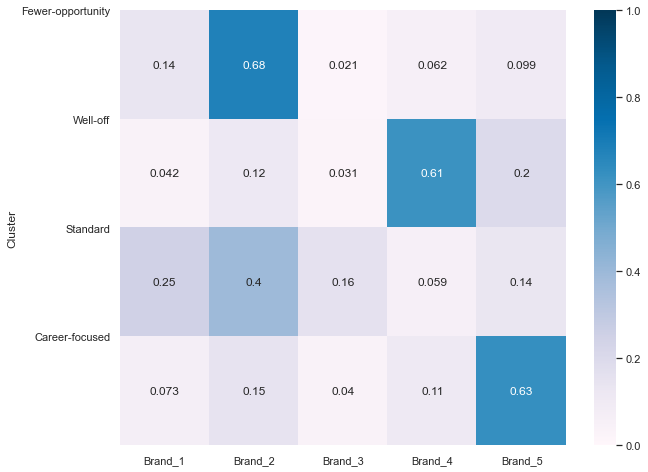

In [39]:
plt.figure(figsize = (10,8))
sns.heatmap(mean_brand_choice,
            vmin = 0,
            vmax = 1,
            cmap = 'PuBu',
            annot = True)
plt.yticks([0,1,2,3], ['Fewer-opportunity','Well-off','Standard','Career-focused'], rotation = 0)
plt.show()

## Revenue

In [40]:
temp = df_purchase_cluster[df_purchase_cluster['Brand']==1]

In [41]:
temp

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,0
556,200000006,636,1,1,5,0,0,1.31,1.56,2.00,...,0,0,0,0,39,1,112347,1,2,3
604,200000007,320,1,1,1,0,0,1.35,1.89,1.98,...,0,0,0,0,27,0,125190,2,1,3
799,200000009,374,1,1,2,0,0,1.21,1.87,2.02,...,0,0,0,0,25,0,108960,0,0,0
858,200000010,60,1,1,3,0,0,1.39,1.90,1.87,...,0,0,0,0,32,0,69370,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58400,200000498,358,1,1,3,0,0,1.10,1.81,2.02,...,0,0,1,1,29,1,114784,1,0,2
58526,200000499,409,1,1,3,0,0,1.33,1.89,2.02,...,0,0,1,0,35,1,73266,0,0,0
58527,200000499,416,1,1,3,1,1,1.34,1.89,2.02,...,0,0,1,0,35,1,73266,0,0,0
58617,200000500,269,1,1,6,0,0,1.37,1.26,1.96,...,0,0,0,0,42,1,120946,1,0,0


In [42]:
temp['Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']

<ipython-input-42-77e28c94b16d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']


In [43]:
temp

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster,Revenue Brand 1
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,0,0,0,47,1,110866,1,0,0,2.94
556,200000006,636,1,1,5,0,0,1.31,1.56,2.00,...,0,0,0,39,1,112347,1,2,3,6.55
604,200000007,320,1,1,1,0,0,1.35,1.89,1.98,...,0,0,0,27,0,125190,2,1,3,1.35
799,200000009,374,1,1,2,0,0,1.21,1.87,2.02,...,0,0,0,25,0,108960,0,0,0,2.42
858,200000010,60,1,1,3,0,0,1.39,1.90,1.87,...,0,0,0,32,0,69370,0,0,0,4.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58400,200000498,358,1,1,3,0,0,1.10,1.81,2.02,...,0,1,1,29,1,114784,1,0,2,3.30
58526,200000499,409,1,1,3,0,0,1.33,1.89,2.02,...,0,1,0,35,1,73266,0,0,0,3.99
58527,200000499,416,1,1,3,1,1,1.34,1.89,2.02,...,0,1,0,35,1,73266,0,0,0,4.02
58617,200000500,269,1,1,6,0,0,1.37,1.26,1.96,...,0,0,0,42,1,120946,1,0,0,8.22


In [44]:
cluster_brands_revenue = pd.DataFrame()
cluster_brands_revenue[['Cluster','Revenue Brand 1']] = temp[['Cluster','Revenue Brand 1']].groupby('Cluster', as_index = False).sum()
cluster_brands_revenue

,Cluster,Revenue Brand 1
0,0,2258.90
1,1,699.47
2,2,2611.19
3,3,736.09


In [45]:
temp = df_purchase_cluster[df_purchase_cluster['Brand']==2]
temp['Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
cluster_brands_revenue[['Cluster','Revenue Brand 2']] = temp[['Cluster','Revenue Brand 2']].groupby('Cluster', as_index = False).sum()

<ipython-input-45-929df285082f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']


In [46]:
temp = df_purchase_cluster[df_purchase_cluster['Brand']==3]
temp['Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']
cluster_brands_revenue[['Cluster','Revenue Brand 3']] = temp[['Cluster','Revenue Brand 3']].groupby('Cluster', as_index = False).sum()

<ipython-input-46-cc9c5ce805ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']


In [47]:
temp = df_purchase_cluster[df_purchase_cluster['Brand']==4]
temp['Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']
cluster_brands_revenue[['Cluster','Revenue Brand 4']] = temp[['Cluster','Revenue Brand 4']].groupby('Cluster', as_index = False).sum()

<ipython-input-47-66ef5fba2ffc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']


In [48]:
temp = df_purchase_cluster[df_purchase_cluster['Brand']==5]
temp['Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']
cluster_brands_revenue[['Cluster','Revenue Brand 5']] = temp[['Cluster','Revenue Brand 5']].groupby('Cluster', as_index = False).sum()

<ipython-input-48-7fe1779ca99e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']


In [49]:
cluster_brands_revenue

,Cluster,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5
0,0,2258.90,13955.14,716.25,1629.31,2230.50
1,1,699.47,1298.23,731.35,14185.57,5509.69
2,2,2611.19,4768.52,3909.17,861.38,2439.75
3,3,736.09,1746.42,664.75,2363.84,19441.06


In [50]:
cluster_brands_revenue['Total Revenue'] = np.sum(cluster_brands_revenue.loc[:,'Revenue Brand 1':'Revenue Brand 5'], axis = 1)

In [51]:
cluster_brands_revenue

,Cluster,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
1,1,699.47,1298.23,731.35,14185.57,5509.69,22424.31
2,2,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
3,3,736.09,1746.42,664.75,2363.84,19441.06,24952.16


In [52]:
cluster_brands_revenue['Cluster Proportion'] = cluster_prop
cluster_brands_revenue['Cluster'] = cluster_brands_revenue['Cluster'].map({0:'Fewer-opportunity',
                                       1:'Well-off',
                                       2:'Standard',
                                       3:'Career-focused'})
cluster_brands_revenue = cluster_brands_revenue.set_index('Cluster')

In [53]:
cluster_brands_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Cluster Proportion
Cluster,,,,,,,
Fewer-opportunity,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
Well-off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Career-focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220


## Interpretation
- Career-focused is 22% of all cluster but contribute the most to Total Revenue
- Career-focused prefer luxury option (the most luxury one)
- Well-off also prefer some luxury but not the high end one, this can interpret as they are loyal to the brand and can afford the price
- Fewer-opportunity is the biggest cluster here, but contribute as the second from the bottom, yes, due to there revenue, and they prefer Brand 2 which is the cheap one but not the cheapest
- Standard is sparsed over all Brand

### Some marketing stratgies we can do here:
- We can increase the price of Brand 5 cuz Career-focused can afford it very well
- We can also increase the proce of Brand 4 with the same reason and Well-Off are loyal to the brand
- We can do promotion on these Top 2 brand too
- We might introduce some brands to Standard group because they are sparsed all over (not strict to anything yet)
- We can do promotion on Brand 2 because most of the buyers are Fewer-opportunity and they are the biggest cluster, so we have high chance to make more profit if we do promotion.